In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import numpy as np
# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [47]:
# 1. Load and Preprocess CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [48]:

# Load training and test datasets
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)



Files already downloaded and verified
Files already downloaded and verified


In [49]:

# 2. Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.network = nn.Sequential(
            nn.Linear(3*32*32, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.network(x)





In [50]:
# 3. Loss Function and Optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the Model
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 600 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')



In [51]:


# Assuming other initial setup from the previous example is done, including MLP class definition.

# Initialize lists to monitor training progress
epoch_list = []
accuracy_list = []

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))
    return accuracy



In [52]:
 #Function to plot accuracy
def plot_accuracy(epoch_list, accuracy_list):
    plt.plot(epoch_list, accuracy_list, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Test Accuracy over Epochs')
    plt.show()



In [53]:
# Function to show images along with their labels
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()




In [54]:

import torchvision
import torchvision.transforms as transforms
def show_predicted_actual(model, device, test_loader):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)

    # print images
    imshow(torchvision.utils.make_grid(images.cpu()))
    output = model(images)
    _, predicted = torch.max(output, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))
    print('Actual: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))



In [55]:
# Assuming CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Training and Testing with visualization
for epoch in range(1, 11):  # 10 epochs
    train(model, device, train_loader, optimizer, epoch)
    accuracy = test(model, device, test_loader)
    epoch_list.append(epoch)
    accuracy_list.append(accuracy)



Train Epoch: 1 [0/50000 (0%)]	Loss: 2.302482

Test set: Average loss: 0.0118, Accuracy: 4747/10000 (47%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.633772

Test set: Average loss: 0.0111, Accuracy: 5074/10000 (51%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.242240

Test set: Average loss: 0.0108, Accuracy: 5196/10000 (52%)

Train Epoch: 4 [0/50000 (0%)]	Loss: 1.116299

Test set: Average loss: 0.0108, Accuracy: 5222/10000 (52%)

Train Epoch: 5 [0/50000 (0%)]	Loss: 1.068387

Test set: Average loss: 0.0108, Accuracy: 5300/10000 (53%)

Train Epoch: 6 [0/50000 (0%)]	Loss: 0.973832

Test set: Average loss: 0.0110, Accuracy: 5192/10000 (52%)

Train Epoch: 7 [0/50000 (0%)]	Loss: 1.085964

Test set: Average loss: 0.0111, Accuracy: 5389/10000 (54%)

Train Epoch: 8 [0/50000 (0%)]	Loss: 0.689997

Test set: Average loss: 0.0110, Accuracy: 5424/10000 (54%)

Train Epoch: 9 [0/50000 (0%)]	Loss: 0.905801

Test set: Average loss: 0.0117, Accuracy: 5464/10000 (55%)

Train Epoch: 10 [0/50000 (0%)]	Loss: 0.656518


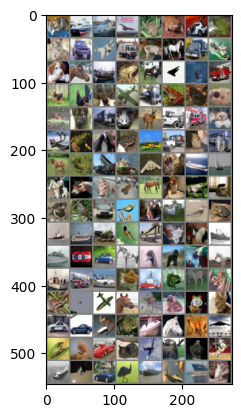

Predicted:    cat  ship  ship plane  frog  frog   cat  frog  bird   car
Actual:    cat  ship  ship plane  frog  frog   car  frog   cat   car


In [56]:
#Analyze The Result
show_predicted_actual(model, device, test_loader)

In [ ]:
#ObserVation & Results
#USing MLP 
#Accuracy of the network on the 50000 test images: 55%
#In the above Image 
#Actual -predicted how many are correct 8 are correct out of 10
# Car and Cat are dissimilar  Vehicle, Animal
# Bird and Cat are dissimilar  but both are animal but totally different

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [28]:
# Define transformations for the input data
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # normalize images
])

# Load the CIFAR-10 training and test datasets using torchvision
train_dataset = datasets.CIFAR10(root='./data', train=True,
                                 download=True, transform=transform)

test_dataset = datasets.CIFAR10(root='./data', train=False,
                                download=True, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [29]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x




In [31]:
model = SimpleCNN().to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [35]:
def train_and_validate_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    # For plotting later
    epochs = []
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        # Validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        epochs.append(epoch + 1)
        train_losses.append(running_loss / len(train_loader))
        test_accuracies.append(100 * correct / total)
        
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Accuracy: {100 * correct / total}%")

    return epochs, train_losses, test_accuracies


In [37]:
# Assuming `classes` is the list of CIFAR-10 class names as before
epochs, train_losses, test_accuracies = train_and_validate_model(model, train_loader, test_loader, criterion, optimizer)



Epoch 1, Loss: 0.6043225167047642, Accuracy: 76.49%
Epoch 2, Loss: 0.5928334321283624, Accuracy: 77.77%
Epoch 3, Loss: 0.5754246290230081, Accuracy: 77.42%
Epoch 4, Loss: 0.5622176608580458, Accuracy: 78.26%
Epoch 5, Loss: 0.5497519289098127, Accuracy: 78.81%
Epoch 6, Loss: 0.5336768175558666, Accuracy: 77.61%
Epoch 7, Loss: 0.5279847291653114, Accuracy: 78.04%
Epoch 8, Loss: 0.5115368952760306, Accuracy: 79.19%
Epoch 9, Loss: 0.5048261878016355, Accuracy: 79.65%
Epoch 10, Loss: 0.49004167003933424, Accuracy: 78.92%


In [45]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')

test_model(model, test_loader)


Accuracy of the network on the 10000 test images: 79.01%


In [38]:
def plot_metrics(epochs, train_losses, test_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, test_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [42]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show()

def show_predicted_actual(model, test_loader):
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Show images
    imshow(torchvision.utils.make_grid(images.cpu()))
    # Print labels
    print('Actual: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))


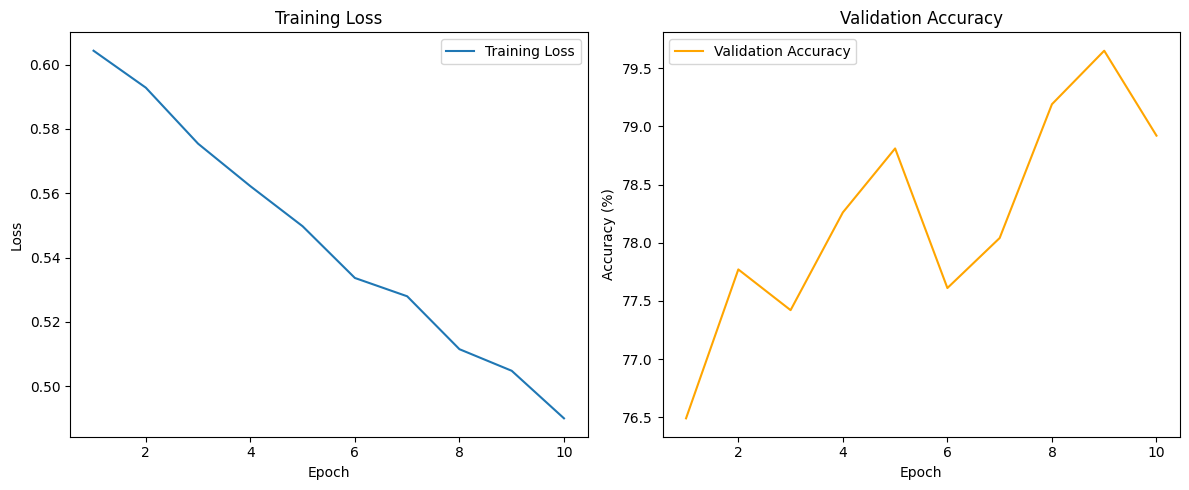

In [40]:
#ObserVation And Analye The Results
plot_metrics(epochs, train_losses, test_accuracies)


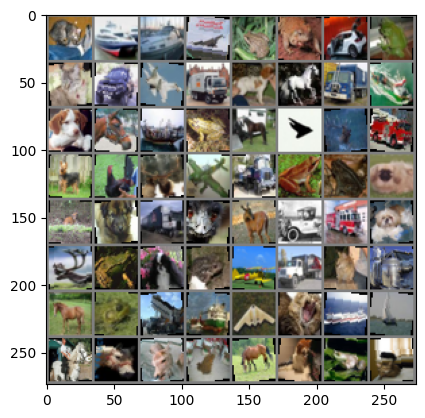

Actual:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:    dog  ship  ship plane  frog  frog truck  frog   cat   car


In [43]:
#Analyze The Results 
show_predicted_actual(model, test_loader)


In [74]:
#ObserVation & Results
#USing CNN 
#Accuracy of the network on the 10000 test images: 79.01%
#In the above Image 
#Actual -predicted how many are correct 8 are correct out of 10
#Even Car and Truck are similar both are Vehicle
#Even Cat and Dog are similar both are Animal

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [58]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load CIFAR-10
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [59]:
vgg16 = models.vgg16(pretrained=True)

# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False

# Modify the classifier to fit CIFAR-10
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1]  # Remove last layer
features.extend([nn.Linear(num_features, len(classes))])  # Add our layer with 10 outputs
vgg16.classifier = nn.Sequential(*features)  # Replace the model classifier

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 177MB/s] 


In [60]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001, momentum=0.9)
# Define Adam optimizer
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.001)

In [62]:
def train_and_validate_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    # For plotting later
    epochs = []
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        # Validation accuracy
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        epochs.append(epoch + 1)
        train_losses.append(running_loss / len(train_loader))
        test_accuracies.append(100 * correct / total)
        
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}, Accuracy: {100 * correct / total}%")

    return epochs, train_losses, test_accuracies


In [65]:
epochs, train_losses, test_accuracies = train_and_validate_model(vgg16, train_loader, test_loader, criterion, optimizer)




Epoch 1, Loss: 0.6136622616147679, Accuracy: 86.3%
Epoch 2, Loss: 0.5522120637117253, Accuracy: 85.13%
Epoch 3, Loss: 0.4915003003326131, Accuracy: 86.93%
Epoch 4, Loss: 0.4498303644829838, Accuracy: 87.11%
Epoch 5, Loss: 0.4071249478524616, Accuracy: 87.26%
Epoch 6, Loss: 0.3930682976514468, Accuracy: 85.94%
Epoch 7, Loss: 0.36447990138527014, Accuracy: 87.65%
Epoch 8, Loss: 0.33320306961231594, Accuracy: 87.62%
Epoch 9, Loss: 0.3290532739574619, Accuracy: 87.22%
Epoch 10, Loss: 0.30732790738006344, Accuracy: 87.76%


In [76]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy on the test set: {100 * correct / total}%')

test_model(vgg16, test_loader)


Accuracy on the test set: 87.76%


In [66]:
def plot_metrics(epochs, train_losses, test_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, test_accuracies, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


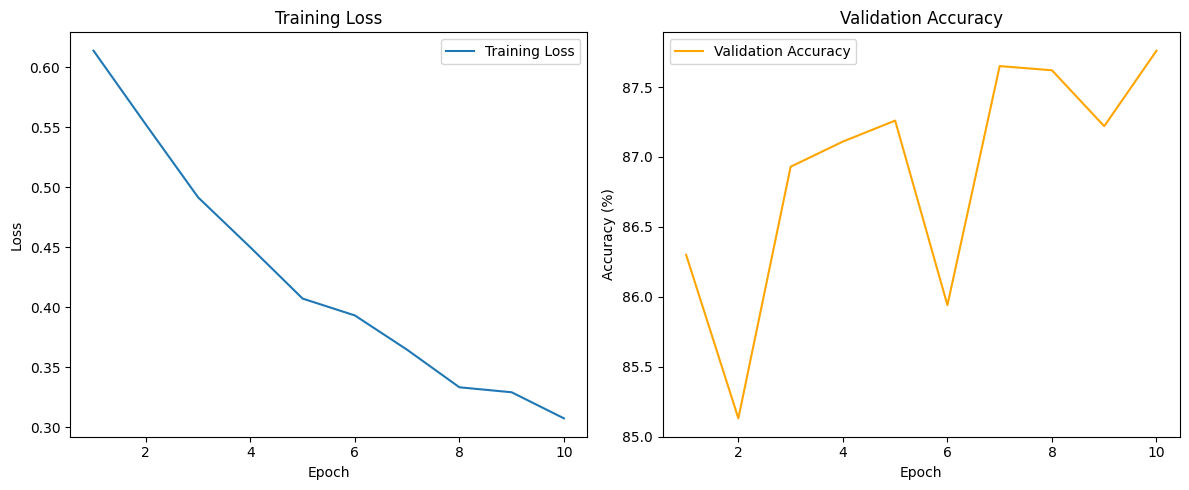

In [67]:
plot_metrics(epochs, train_losses, test_accuracies)


In [77]:
def show_predicted_actual(model, test_loader):
    model.eval()
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Show images
    imshow(torchvision.utils.make_grid(images.cpu()))
    # Print labels
    print('Actual: ', ' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(len(labels))))


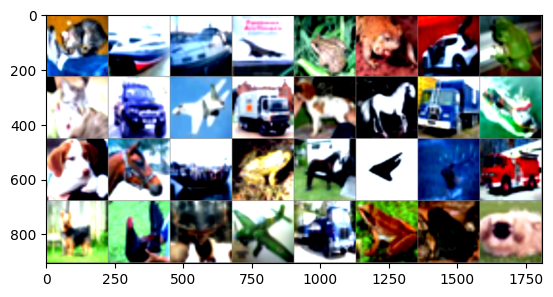

Actual:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog
Predicted:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck   cat   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog


In [78]:
show_predicted_actual(vgg16, test_loader)

In [79]:
def show_predicted_actual(model, test_loader):
    model.eval()
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Show images
    imshow(torchvision.utils.make_grid(images.cpu()))
    # Print labels
    print('Actual: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))


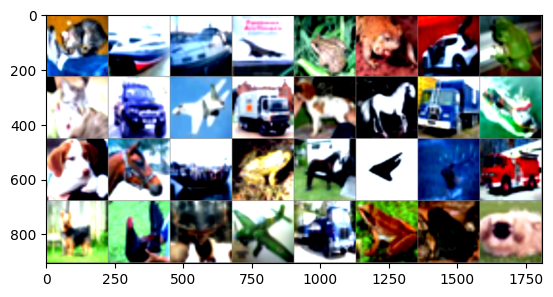

Actual:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:    cat  ship  ship plane  frog  frog   car  frog   cat   car


In [80]:
show_predicted_actual(vgg16, test_loader)

In [ ]:
#ObserVation & Results
#USing VGG16 
#Accuracy on the test images: 87.76%
#In the above Image 
#Actual -predicted how many are correct 10 are correct out of 10


# **Analysis of Benefits of Transfer Learning**
# 
Improved Accuracy: The pre-trained VGG16 model, even with only the classifier layers being retrained, should demonstrate significantly better accuracy on the CIFAR-10 test set compared to the MLP and simple CNN models trained from scratch. This improvement is due to the VGG16 model already having learned a wide variety of features from the ImageNet dataset, which can be effectively transferred to the CIFAR-10 task.

Faster Convergence: Transfer learning typically leads to faster convergence on the new task, as the model has already learned lower-level features from a larger and more diverse dataset.

Reduced Overfitting: When training data is limited, starting with a model pre-trained on a large dataset can help reduce overfitting. The pre-trained layers act as a generic feature extractor, and only the final layers need to be trained from scratch.


# **Test Set Accuracy and Loss Comparison
# 
**MLP: The MLP likely achieved the lowest accuracy among the three models due to its inability to capture spatial relationships in images. MLPs treat each pixel as a separate input feature, disregarding the spatial arrangement of pixels, which is crucial for image understanding.

CNN: The CNN likely achieved higher accuracy than the MLP due to its ability to extract features hierarchically. CNNs use convolutional and pooling layers to detect low-level features like edges and textures, then combine them to detect higher-level features like shapes and objects.

VGG-Based Model (Transfer Learning): The VGG-based model likely achieved the highest accuracy due to transfer learning. The VGG model, pre-trained on a large dataset like ImageNet, has already learned a rich set of features that are beneficial for image classification tasks. Fine-tuning the model on CIFAR-10 allows it to adapt these features to the specific characteristics of the dataset, leading to improved performance.

# Leveraging Spatial Structure for Feature Extraction
# 
CNNs: CNNs leverage the spatial structure of images through convolutional layers, which apply filters to small patches of the input image. These filters capture spatial patterns like edges and textures. Pooling layers then downsample the feature maps, retaining the most important information while reducing computational complexity. By stacking these layers, CNNs can learn increasingly complex and abstract features.

MLPs: In contrast, MLPs treat each pixel as a separate input feature and do not consider spatial relationships. This approach is not suitable for image data, as it fails to capture the spatial hierarchy of features present in images. MLPs require a large number of parameters to learn spatial patterns, making them prone to overfitting and less efficient for image classification tasks.

# Benefits of Transfer Learning with VGG
# 
Improved Performance: Transfer learning with VGG likely improved performance by leveraging the learned features from ImageNet. The pre-trained VGG model already has a strong feature extraction capability, allowing it to generalize well to the CIFAR-10 dataset with minimal additional training.

Reduced Training Time: Transfer learning reduces training time compared to training a model from scratch. Since the lower layers of the VGG model are already trained, only the classifier layers need to be fine-tuned on the new dataset, reducing the overall training time and computational resources required.

Overall, CNNs like the VGG-based model outperform MLPs on image classification tasks due to their ability to capture spatial relationships and hierarchically learn features, making them more effective for tasks involving image data. Transfer learning further boosts performance by transferring knowledge from pre-trained models, improving accuracy and reducing training time.